# USD AAI 511 - Assingment #3 - Build a Convolutional Neural Network

by Bryan Carr

18 July 2022



In this assignment, we will build a basic CNN to classify the handwritten images in the MNIST data set. The MNIST dataset was sourced from Kaggle.com, at:

https://www.kaggle.com/datasets/hojjatk/mnist-dataset



## 3.1 - Reading in the Data

I will begin by reading in the data, using the class and code provided by H. Khodabakhsh on Kaggle.com.

In [1]:
# This Code provided by H. Khodabakhsh on Kaggle.com
# https://www.kaggle.com/code/hojjatk/read-mnist-dataset/notebook
# Accessed 18 July 2022
# This block of code provides a class and function to read in the data
#
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

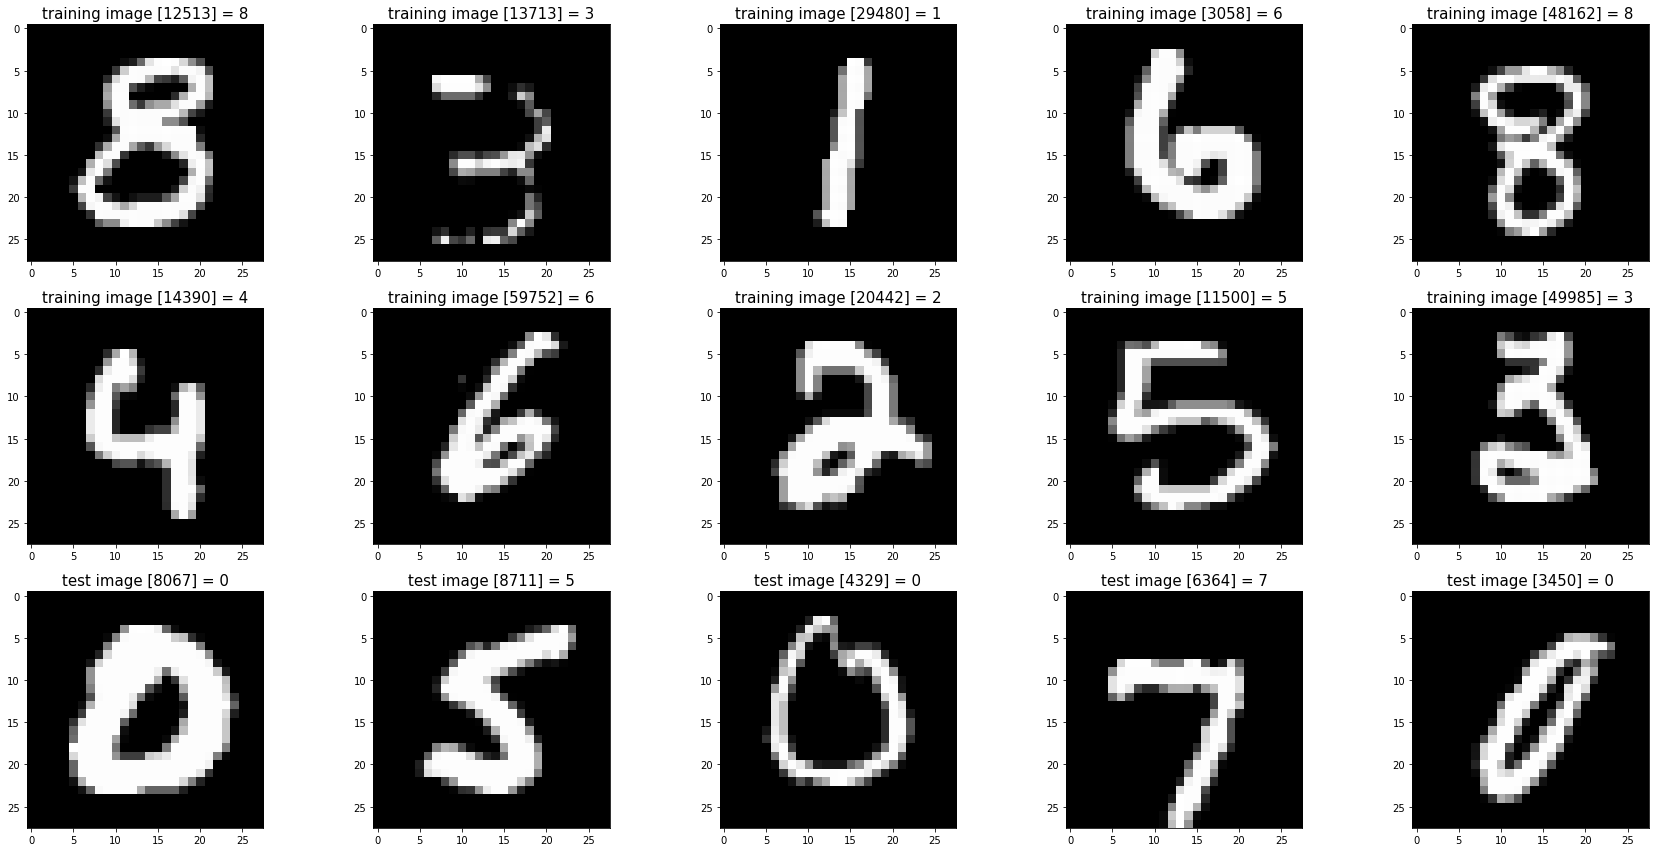

In [2]:
# This Code provided by H. Khodabakhsh on Kaggle.com
# https://www.kaggle.com/code/hojjatk/read-mnist-dataset/notebook
# Accessed 18 July 2022
# This block calls the class to read in the data, then plots 10 samples from Train and 5 from Test
#
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = '/content/drive/MyDrive/AAI511/Assign3/'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [3]:
# Preprocess our Data
#
# The data is set up as a List of Arrays. We need it to be in an Array

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


# Normaliize the image data as Floats
# The images contain greyscale pixel values from 0 (black) to 255 (white)
# Scaling them down by 255 to turn them into fractions should help with computing down the line

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## 3.2 - Build the CNN

Next up I will build the CNN, using Tensorflow and Keras libraries.

I will use two Convolving layers, with Max Pooling at the end. These fill feed into a flattener, which will then feed into a three-layer fully connected network for classification.

Input Layer (28x28) =>

Convolving Layer 1 (3x3, stride 1) => (26x26) output =>

Max Pooling Layer 1 (2x2, stride 2) => (13x13) output =>

Convolving Layer 2 (3x3, stride 1) => (11x11) output =>

Max Pooling Layer 2 (2x2, stride 2) => (6x6) output =>



In [20]:
# Import key libraries from Tensorflow and Keras

import tensorflow as tf
from keras import models
from keras import layers


# Set the random seeds, to help ensure we can reproduce the results
np.random.seed(18)
tf.random.set_seed(18)


In [21]:
cnn1 = models.Sequential()

cnn1.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28,28,1), name='conv1'))
cnn1.add(layers.MaxPool2D(pool_size=(2,2), name='pool1'))

cnn1.add(layers.Conv2D(64, (3,3), activation='relu', name='conv2'))
cnn1.add(layers.MaxPool2D((2,2), name='pool2'))

cnn1.add(layers.Flatten(name='flatten'))

cnn1.add(layers.Dense(500, activation='relu', name='dense1'))
cnn1.add(layers.Dense(64, activation='relu', name='dense2'))
cnn1.add(layers.Dense(10, activation='softmax', name='output'))

In [22]:
# Print a Summary of the architecture of the model

cnn1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 26, 26, 32)        320       
                                                                 
 pool1 (MaxPooling2D)        (None, 13, 13, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 11, 11, 64)        18496     
                                                                 
 pool2 (MaxPooling2D)        (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense1 (Dense)              (None, 500)               800500    
                                                                 
 dense2 (Dense)              (None, 64)               

In [23]:
# Next, Compile our Model
# We will use the Adam Optimizer algorithm, and the Cross Entropy to evaluate Loss
# We need to use Sparse Categorical Cross Entropy for our labels in a 1-dimensional array,
#   Categorical-CrossEntropy requires One-Hot Encoded label data

cnn1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
history = cnn1.fit(x_train, y_train, epochs=10, batch_size=100, verbose=1, validation_split=0.1)

Epoch 1/10
540/540 [==============================] - 3s 4ms/step - loss: 0.1768 - accuracy: 0.9459 - val_loss: 0.0565 - val_accuracy: 0.9833
Epoch 2/10
540/540 [==============================] - 2s 4ms/step - loss: 0.0487 - accuracy: 0.9849 - val_loss: 0.0387 - val_accuracy: 0.9878
Epoch 3/10
540/540 [==============================] - 2s 4ms/step - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.0422 - val_accuracy: 0.9875
Epoch 4/10
540/540 [==============================] - 2s 4ms/step - loss: 0.0245 - accuracy: 0.9921 - val_loss: 0.0419 - val_accuracy: 0.9890
Epoch 5/10
540/540 [==============================] - 2s 4ms/step - loss: 0.0183 - accuracy: 0.9942 - val_loss: 0.0402 - val_accuracy: 0.9895
Epoch 6/10
540/540 [==============================] - 2s 4ms/step - loss: 0.0144 - accuracy: 0.9953 - val_loss: 0.0275 - val_accuracy: 0.9923
Epoch 7/10
540/540 [==============================] - 2s 4ms/step - loss: 0.0108 - accuracy: 0.9965 - val_loss: 0.0339 - val_accuracy: 0.9922
Epoch 

## 3.3 - Results

Let's begin by plotting our change in Loss and Accuracy with Training Epochs.

In [25]:
history.history

{'accuracy': [0.9459444284439087,
  0.9849073886871338,
  0.9899444580078125,
  0.9920926094055176,
  0.9942407608032227,
  0.9952777624130249,
  0.9965370297431946,
  0.9963889122009277,
  0.9973703622817993,
  0.9975370168685913],
 'loss': [0.17679892480373383,
  0.04868993163108826,
  0.031700752675533295,
  0.02448774129152298,
  0.018327880650758743,
  0.014443383552134037,
  0.010786312632262707,
  0.010881252586841583,
  0.00798888225108385,
  0.007237379439175129],
 'val_accuracy': [0.9833333492279053,
  0.9878333210945129,
  0.987500011920929,
  0.9890000224113464,
  0.9894999861717224,
  0.9923333525657654,
  0.9921666383743286,
  0.9903333187103271,
  0.9909999966621399,
  0.9916666746139526],
 'val_loss': [0.05647317320108414,
  0.03872533515095711,
  0.04218798503279686,
  0.041899148374795914,
  0.04024219140410423,
  0.02745973691344261,
  0.03386285528540611,
  0.03341878578066826,
  0.03425917029380798,
  0.044323455542325974]}

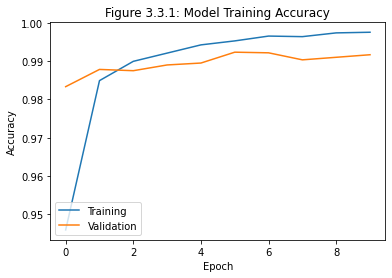

In [26]:
# Plot Accuracies

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Figure 3.3.1: Model Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower left')
plt.show()

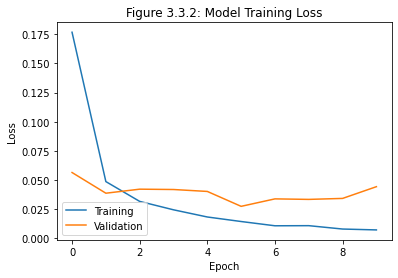

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Figure 3.3.2: Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower left')
plt.show()

In [28]:
# Evaluate the model on the Test data

cnn1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0320 - accuracy: 0.9921


[0.0320158377289772, 0.9921000003814697]

We can see good convergence of our accuracy and losses throughout fitting. We could have stopped with much fewer epochs to achieve a similar result. In fact, 5-6 Epochs would be the ideal spot, as both values are slightly closer there, indicating a small amount of overfitting with the additional training.

On our test data, we achieve very respectable results of 99.21% accuracy and 0.032 Cross-Entropy Loss.

We should check to see which digits are being mis-classified the most, as that may help inform on the performance of the model.

In [29]:
y_pred = cnn1.predict(x_test)

In [30]:
np.shape(y_pred)

(10000, 10)

In [31]:
# the Predict function of our model returns the probabilities of each label
# To turn that into a label, we will iterate through them, picking the maximum probability
# Then we can compare with our 

y_prediction = []

for i in range (10000):
  y_prediction.append( np.argmax(y_pred[i]))

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [33]:
# Check the data for the most common values in the test set

import pandas as pd
pd.DataFrame(y_test).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

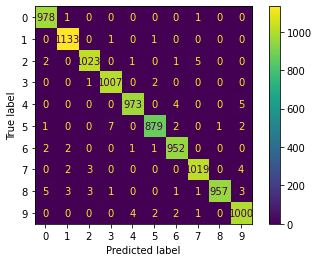

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test, y_prediction)

We can see that most of the more common mis-classifications follow some similarities about the features present in the written structures of the digits:

8 is mislabelled as 0 (5 times), as both have loops;
9 is mis labelled as 4 (4 times) and 4 mis labelled as a 9 (5 times), as both have a closed shape on top of a vertical line;
5 is mis-labelled as a 3 (7 times), as both have sideways C-shapes;
2 is mis-labelled as 7 (5 times), as both can be similar save for the line/bar on the bottom of the 2;
etc.

Overall, with an accuracy of just over 99%, I am quite satisfied with the performance of this classifier.

## References

I was well assisted by several references and coding tutorials. In particular, the tutorials gave good starting points for the model's parameters.


Kodabakhsh, H. (n.d.). Read MNIST Dataset | Kaggle. Kaggle.Com. Retrieved July 18, 2022, from https://www.kaggle.com/code/hojjatk/read-mnist-dataset/notebook

Ductileasy. (2021, January 2). #02 Convolutional neural network : MNIST Dataset (99% accuracy) [Video]. YouTube. https://www.youtube.com/watch?v=9cPMFTwBdM4

Goeduhub Technologies. (2021, April 8). How to develop a Convolutional Neural Network MNIST Handwritten digits classification Tensorflow 2.x [Video]. YouTube. https://www.youtube.com/watch?v=K3ZarjvT24I